In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.models import load_model

def model_load(model=''):
  return load_model(model)

In [ ]:
lstm=model_load('/content/drive/MyDrive/CSE-400(Project Thesis)/model_lstm.h5')
gru=model_load('/content/drive/MyDrive/CSE-400(Project Thesis)/model_GRU.h5')
cnn_lstm=model_load('/content/drive/MyDrive/CSE-400(Project Thesis)/cnn_lstm.h5')
cnn_gru=model_load('/content/drive/MyDrive/CSE-400(Project Thesis)/cnn_gru.h5')

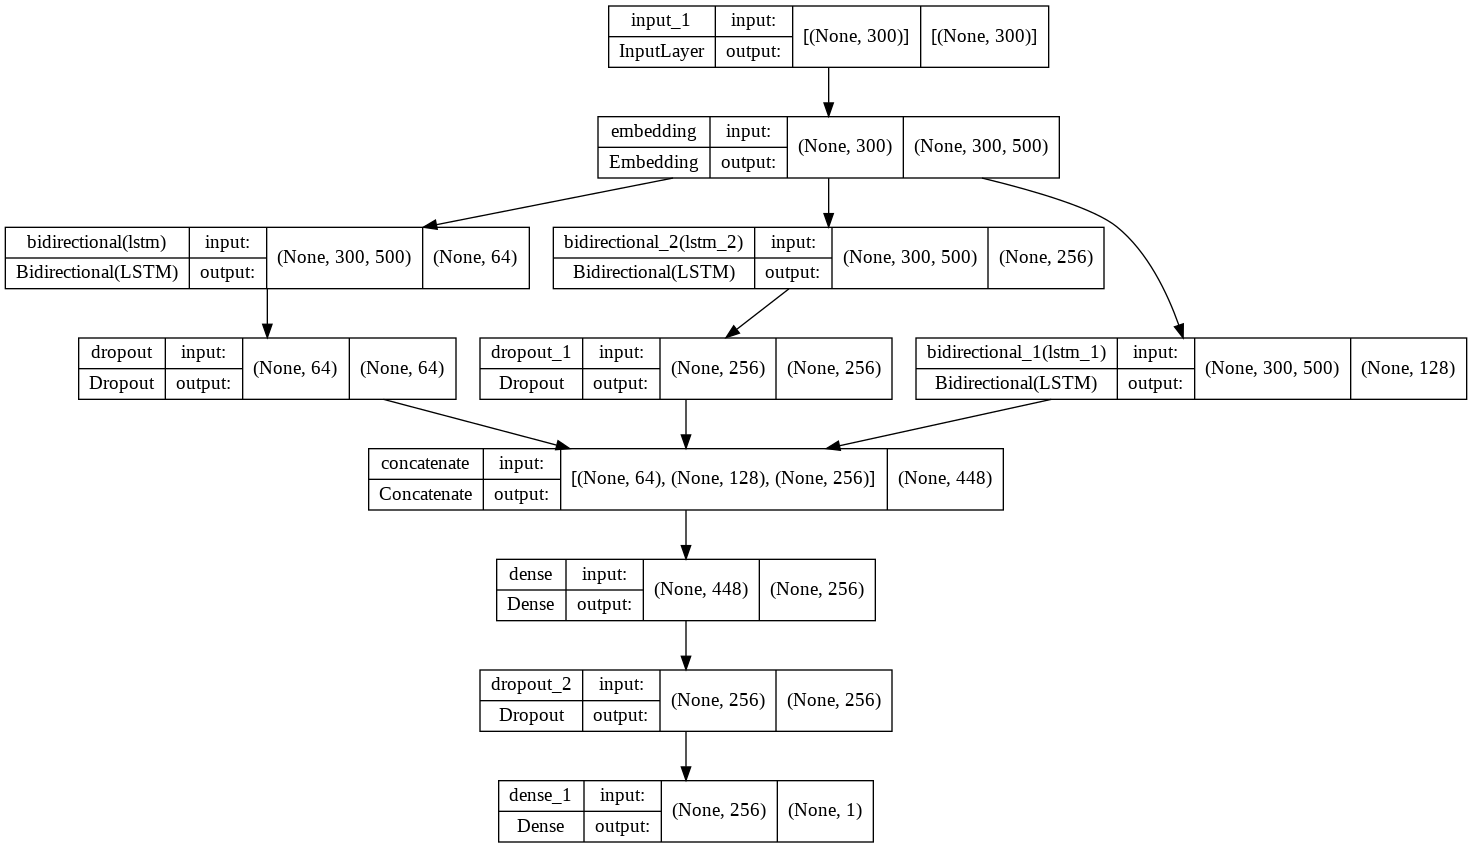

In [ ]:
import tensorflow as tf 
tf.keras.utils.plot_model(lstm, to_file='/content/drive/MyDrive/CSE-400(Project Thesis)/lstm_arc.png', show_shapes=True)

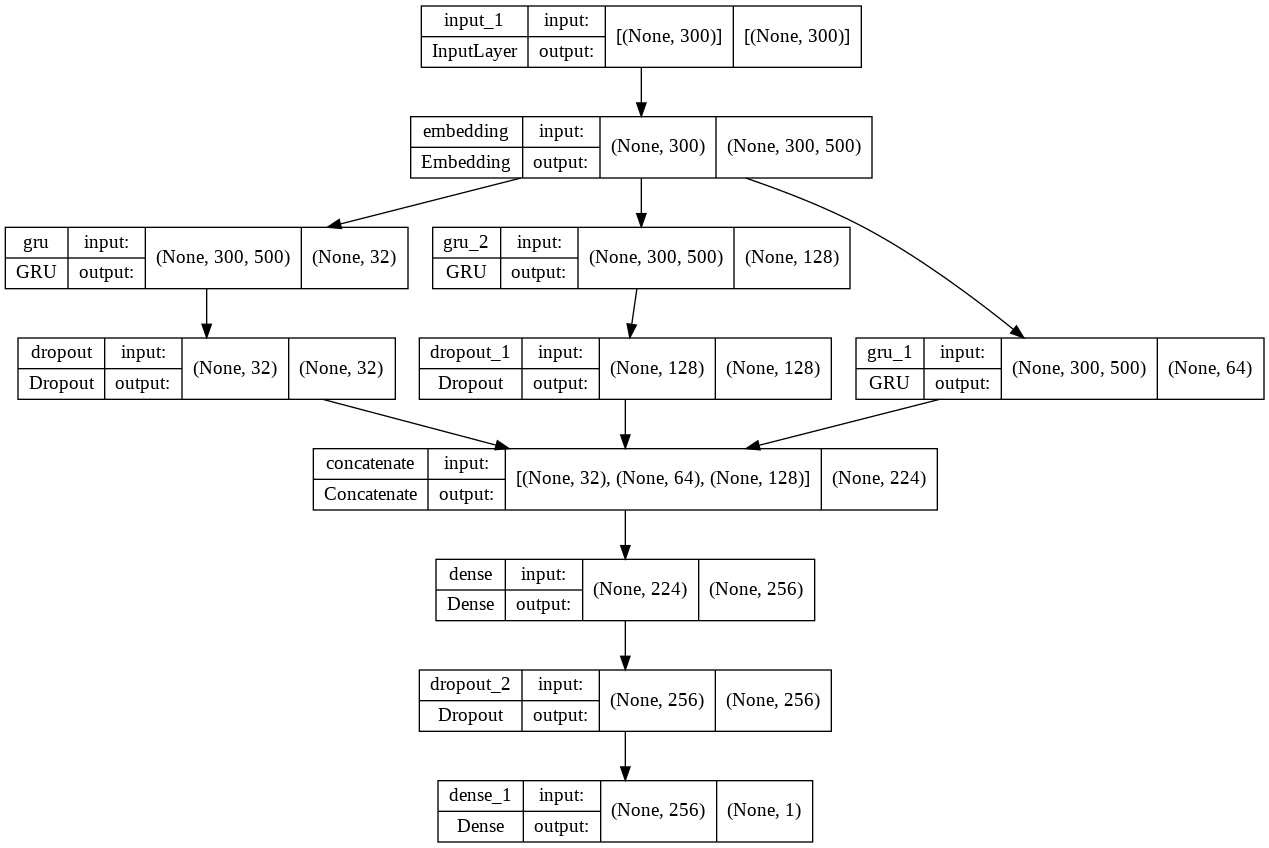

In [ ]:
import tensorflow as tf 
tf.keras.utils.plot_model(gru, to_file='/content/drive/MyDrive/CSE-400(Project Thesis)/gru.png', show_shapes=True, dpi=200)

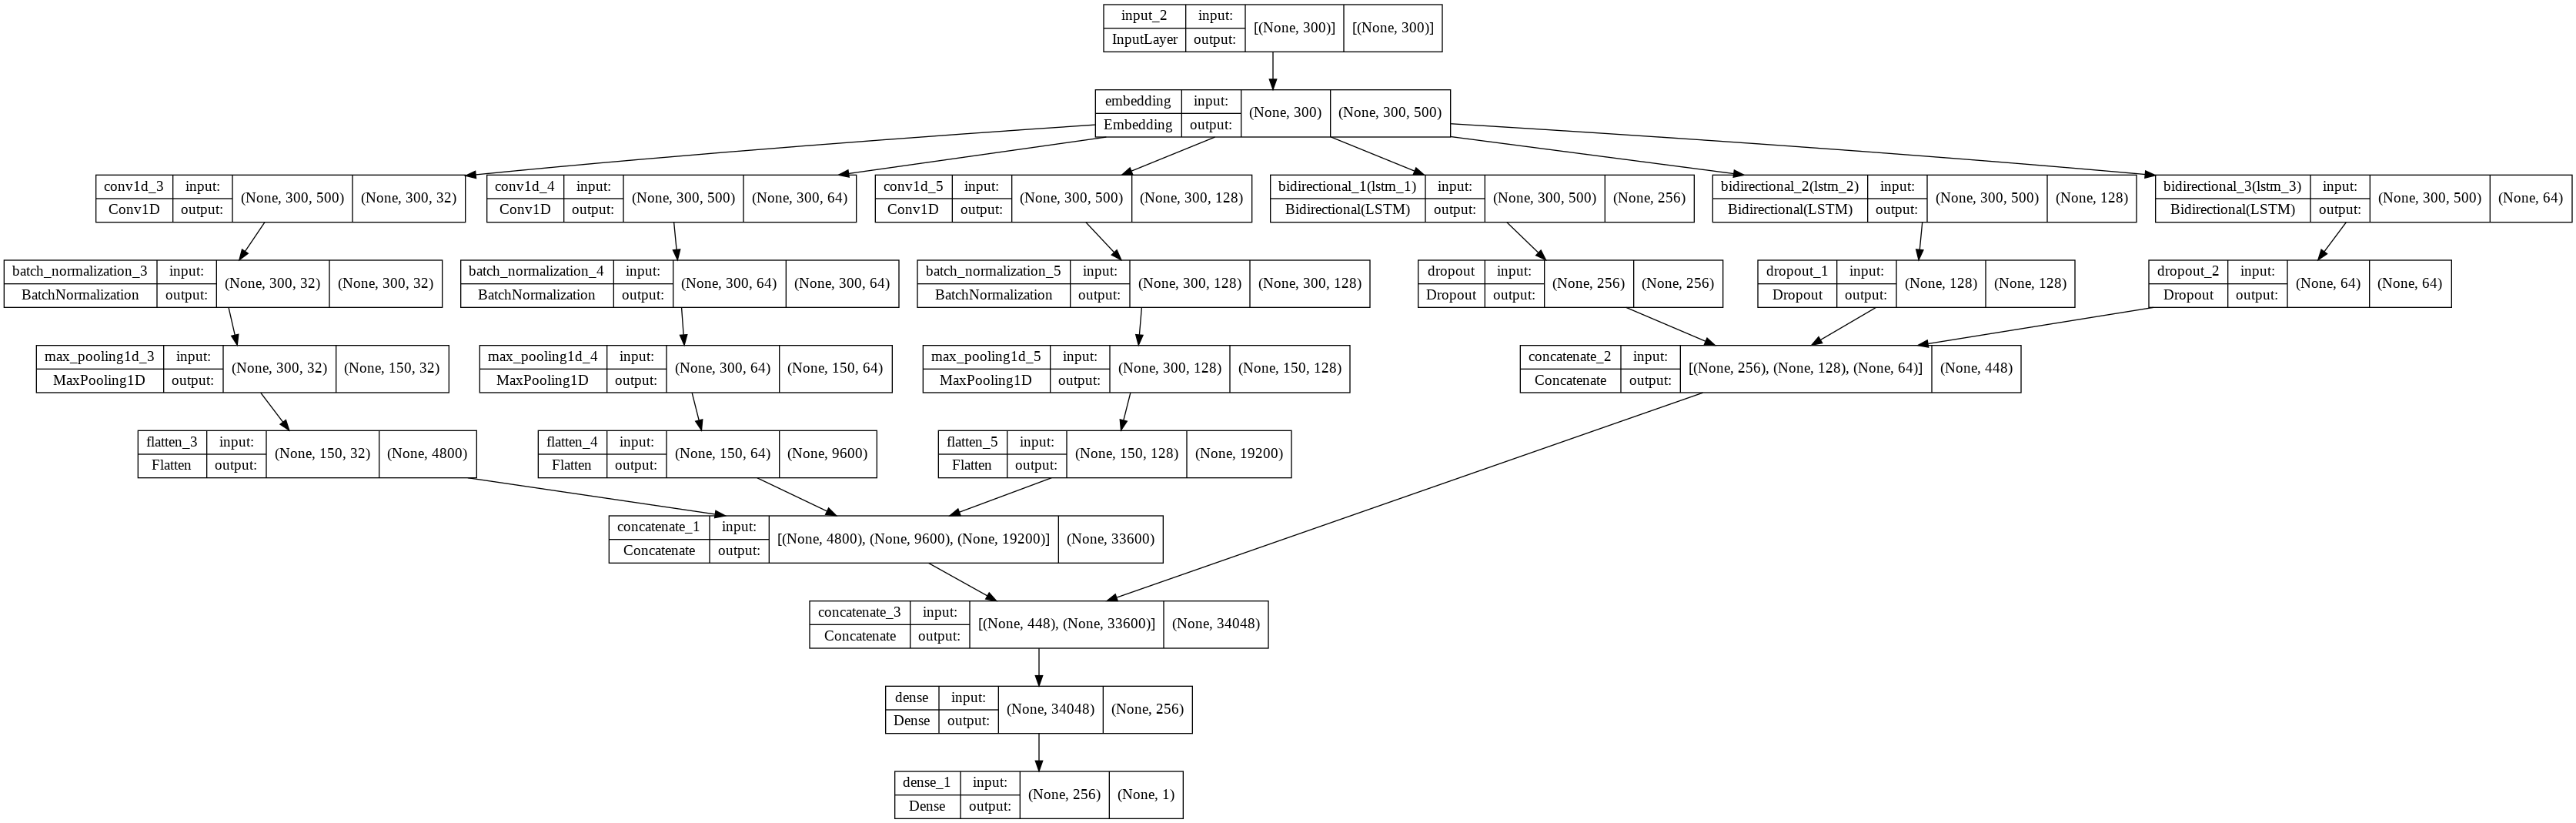

In [ ]:
import tensorflow as tf 
tf.keras.utils.plot_model(cnn_lstm, to_file='/content/drive/MyDrive/CSE-400(Project Thesis)/cnn_lstm_arc.png', show_shapes=True)

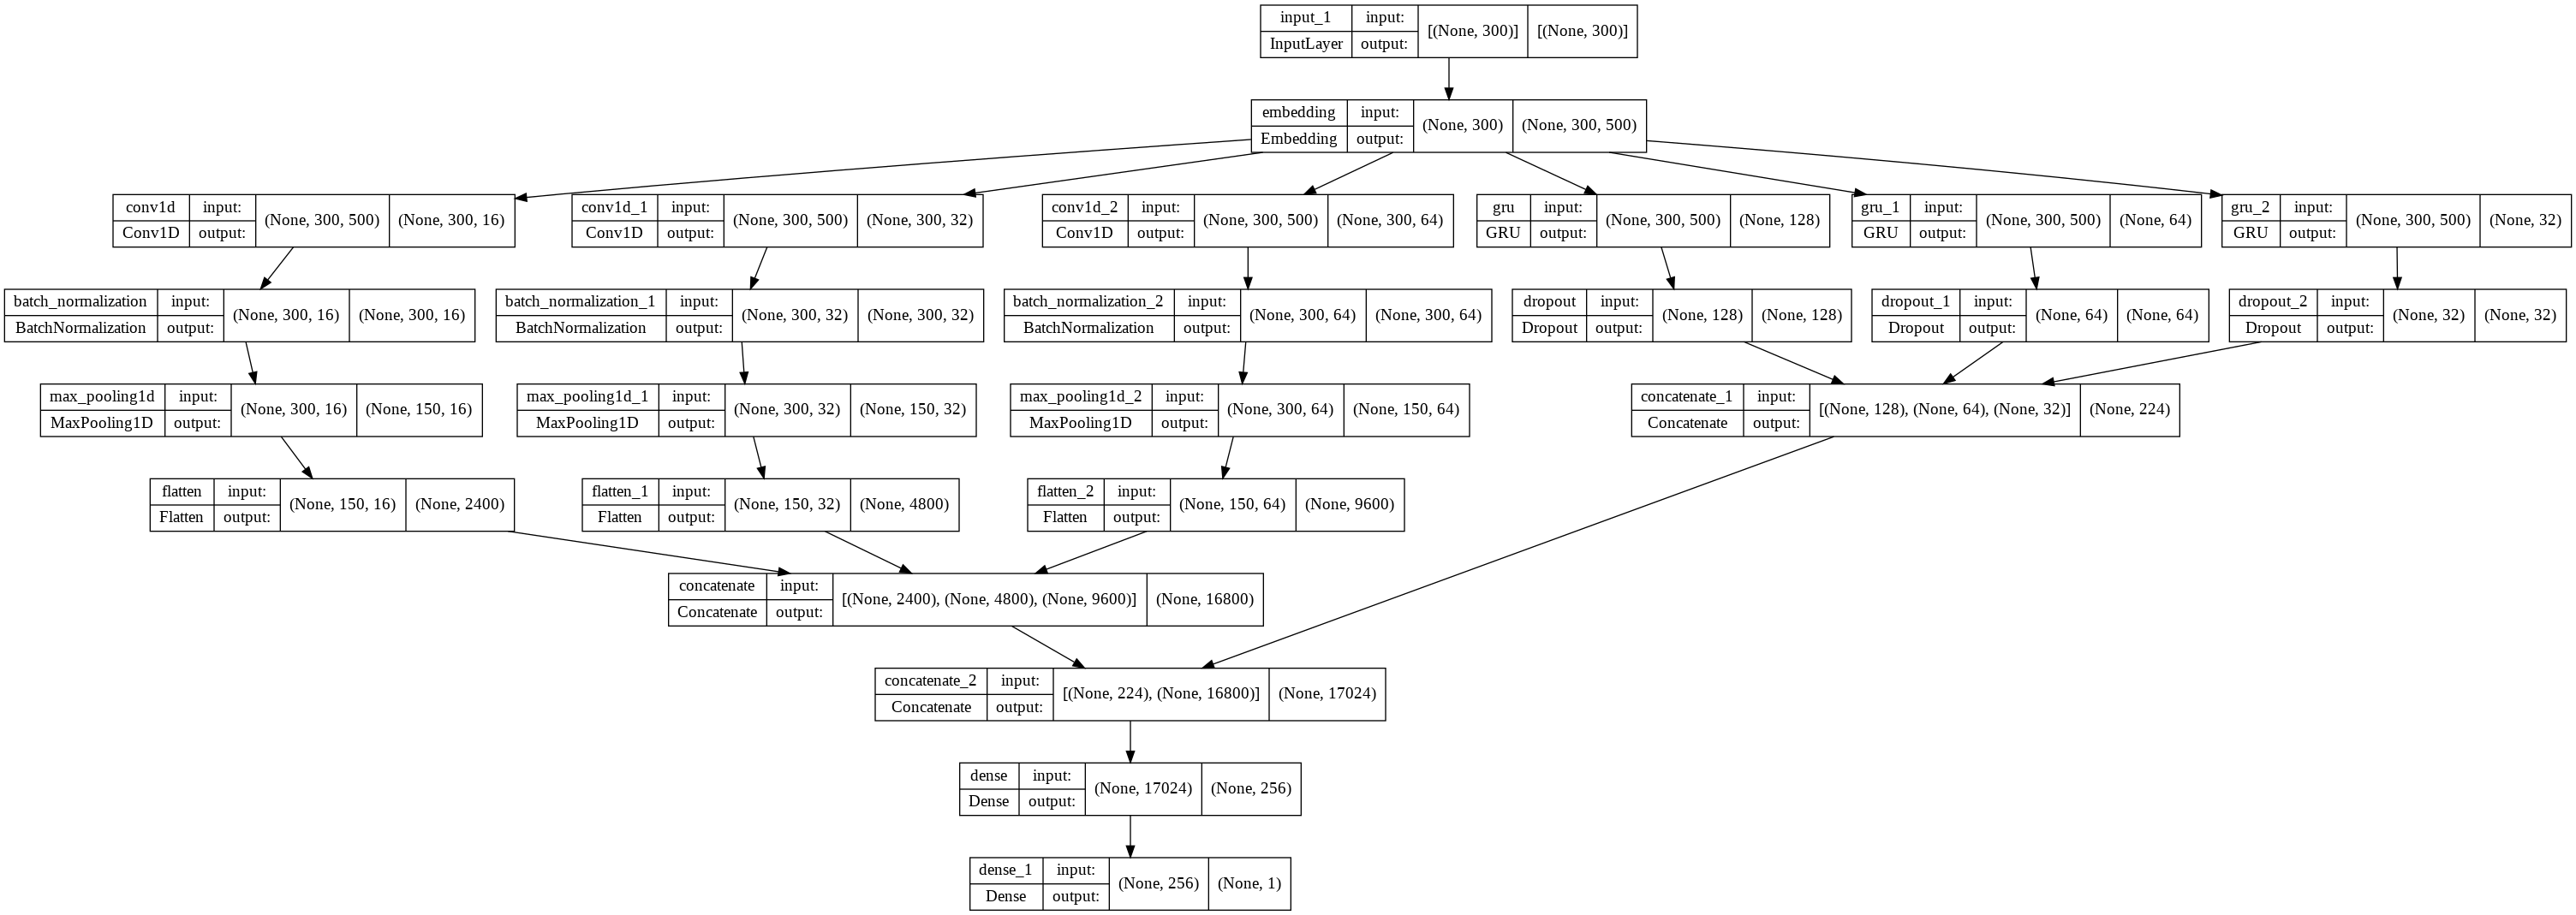

In [ ]:
import tensorflow as tf 
tf.keras.utils.plot_model(cnn_gru, to_file='/content/drive/MyDrive/CSE-400(Project Thesis)/cnn_gru.png', show_shapes=True)

In [ ]:
!pip install bnlp-toolkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 23.9 MB 1.2 MB/s 
     |████████████████████████████████| 1.2 MB 57.4 MB/s 
     |████████████████████████████████| 965 kB 59.2 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
import re
from bnlp.corpus import stopwords

punkt not found. downloading...


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.7/dist-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [ ]:
def preprocess(data):
    """This function is for preprocessing of the news contents. It removes punctuations, English characters and both of Bangla
    and English numerals. It tokenizes all the words and also removes stopwords.
    
    Args: 
        The Entire Dataframe
    Returns:
        Preprocessed news corpuses in a list of lists
    """
    corpus=[]
    for i in range(0, len(data)):
        x=re.sub('[^\u0980-\u09FF]',' ',data['content'][i])
        x=re.sub('[a-zA-Z0-9]+', ' ', x)
        x=re.sub('[০১২৩৪৫৬৭৮৯]+', ' ', x)
        x=x.split()
        x=[w for w in x if w not in set(stopwords)]
        x=' '.join(x)
        corpus.append(x)
    
    return corpus

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import *
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
sns.set()

In [ ]:
label_auth=pd.read_csv(r'/content/drive/MyDrive/AutoEncoders/LabeledAuthentic-7K.csv') #, nrows=3067)
label_fake=pd.read_csv(r'/content/drive/MyDrive/AutoEncoders/LabeledFake-1K.csv') #, nrows=995)
label_auth.drop(['source','relation'], axis=1, inplace=True)
label_fake.drop(['source','relation','F-type'], axis=1, inplace=True)
df=pd.concat([label_auth, label_fake], axis=0)
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)
df['label']=np.where(df['label']==0.0, 0, 1)
df.tail()
df=df.sample(frac=1).reset_index(drop=True)
print(df.shape)
df.head()

(8501, 7)


,articleID,domain,date,category,headline,content,label
0,6429,mzamin.com,2018-09-25 22:28:46,Editorial,চাকরিতে প্রবেশের বয়সসীমা বাড়িয়ে ৩৫ করা হোক,দেশে দিন দিন শিক্ষার হার বাড়ছে। সেই সঙ্গে পাল্...,1
1,594,kalerkantho.com,2018-09-22 08:49:28,International,কুষ্টিয়ায় বিদ্যুৎস্পৃষ্ট হয়ে প্রাণ গেল যুবকের,কুষ্টিয়ার দৌলতপুরে বিদ্যুৎস্পৃষ্ট হয়ে রিন্টু (...,1
2,7479,jagonews24.com,2018-09-21 15:24:31,National,টাকাসহ ৩ ছেলেকে নিয়ে উধাও স্ত্রী,নিখোঁজ স্ত্রী ও তিন ছেলেকে ফিরে পেতে সংবাদ সম...,1
3,381,rtnn.net,2018-09-24 18:34:40,Politics,বিএনপি-জামায়াতই আমাদের শত্রু: ওবায়দুল কাদের,নিজস্ব প্রতিবেদক আরটিএনএন ঢাকা: আগামী নির্বাচন...,1
4,2224,mzamin.com,2018-09-24 21:29:27,National,কথিত বাংলাদেশি অভিবাসীদের ‘উইপোকা’ বললেন অমিত শাহ,বাংলাদেশি অভিবাসীদের উইপোকার (টারমাইটস) সঙ্গে ...,1


In [ ]:
corpus=preprocess(df)
corpus[16:20]

['সৌদি নারীদের পছন্দ সৌদি পুরুষদের স্বামী হিসেবে কমই পছন্দ দেশের নারীরা দাম্পত্য জীবনে স্থিতি নিরাপত্তার সৌদি নারীরা বেশির ভাগ বিদেশিদেরই স্বামী হিসেবে গ্রহণ বেশির ভাগ সৌদি নারীই বিয়ে ডিভোর্স স্বামীর বহুবিবাহের কারণে শেষ এছাড়া নির্দিষ্ট বৃত্তের বাইরে সামাজিক সাংস্কৃতিক স্বাধীনতা পাওয়া যায় জন্যই স্বামী হিসেবে বাংলাদেশী পুরুষদেরই পছন্দ সৌদি নারীদের জরিপ রিপোর্টের উদ্ধৃতি দিয়ে খবর দিয়েছে সৌদি আরবের প্রভাবশালী গণমাধ্যম আরব নিউজ হাদি মাক্কি নামের এক হাসপাতালের নার্স সাংস্কৃতিক প্রতিবন্ধকতা এড়াতে বিবাহবিচ্ছেদের হার হওয়ায় অগণিত তরুণী সৌদি পরিবারে বিয়ে ভয় পান বিদেশে আরেকটু স্বাধীনভাবে জীবনযাপন সমাজে সৌদি নারীই আরবের দেশের পুরুষদের বিয়ে আরবের সাংস্কৃতিক সত্তার মিল থাকায় সম্ভব হয়েছে গভীর উপজাতীয় শেকড় বিদ্যমান কমই সংস্কৃতির বাইরের মানুষকে বিয়ে আগ্রহী আইন পরামর্শদাতা আবদুল আজিজ দাশমান উপসাগরীয় অঞ্চলের মানুষের কুয়েতের নাগরিককে বিয়ে সৌদি নারীরা সালের এক জরিপে তথ্য পাওয়া যায় উপসাগরীয় দেশগুলোর ইয়েমেনের পুরুষরাই বিয়ে সৌদি নারীদের এছাড়া অন আরব বিয়ে সামাজিক টাবু সত্ত্বেও সৌদি নারী পাকিস্তানিদের বিয়ে আরো 

In [ ]:
y=df['label']

In [ ]:
import tensorflow as tf
import keras
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences

In [ ]:
voc_size=150000
onehot_repr=[one_hot(words, voc_size) for words in corpus] 

In [ ]:
sent_length=300
embedded_docs=pad_sequences(onehot_repr, maxlen=sent_length, truncating='post')
print(embedded_docs)

[[ 96775 106844  35586 ... 129444 117915  20061]
 [     0      0      0 ...  99363 102334  77490]
 [     0      0      0 ...  85933  16862 141059]
 ...
 [     0      0      0 ... 121565  42342  56109]
 [     0      0      0 ... 105320  42342 149057]
 [ 99248 100066  62981 ... 105490  18953   2788]]


In [ ]:
len(embedded_docs)

8501

In [ ]:
X_final=np.array(embedded_docs)
y_final=np.array(y)
X_final.shape, y_final.shape

((8501, 300), (8501,))

In [ ]:
lstm_pred=lstm.predict(X_final)
gru_pred=gru.predict(X_final)
cnn_lstm_pred=cnn_lstm.predict(X_final)
cnn_gru_pred=cnn_gru.predict(X_final)

In [ ]:
lstm_pred=lstm_pred.round()
gru_pred=gru_pred.round()
cnn_lstm_pred=cnn_lstm_pred.round()
cnn_gru_pred=cnn_gru_pred.round()

In [ ]:
print(f'Actual Outcomes ---> {y_final[:10]}')
print(f'Prediction Outcomes in LSTM Model ---> {lstm_pred[:10]}')
print(f'Prediction Outcomes in GRU Model ---> {gru_pred[:10]}')
print(f'Prediction Outcomes in CNN_LSTM Model ---> {cnn_lstm_pred[:10]}')
print(f'Prediction Outcomes in CNN_GRU Model ---> {cnn_gru_pred[:10]}')

Actual Outcomes ---> [1 1 1 1 1 1 1 1 1 1]
Prediction Outcomes in LSTM Model ---> [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
Prediction Outcomes in GRU Model ---> [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
Prediction Outcomes in CNN_LSTM Model ---> [[1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]]
Prediction Outcomes in CNN_GRU Model ---> [[0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [ ]:
def model_accuracy(pred):
  return accuracy_score(y, pred)


lstm_accuracy=model_accuracy(lstm_pred).round(2)
gru_accuracy=model_accuracy(gru_pred).round(2)
cnn_lstm_accuracy=model_accuracy(cnn_lstm_pred).round(2)
cnn_gru_accuracy=model_accuracy(cnn_gru_pred).round(2)

In [ ]:
accuracy_scores={'Models Used':['LSTM', 'GRU', 'CNN-LSTM', 'CNN-GRU'],
                 'Accuracy':[lstm_accuracy, gru_accuracy, cnn_lstm_accuracy, cnn_gru_accuracy]
}


df_acc=pd.DataFrame(accuracy_scores)
df_acc=df_acc.sort_values('Accuracy')
df_acc.to_csv('/content/drive/MyDrive/CSE-400(Project Thesis)/Accuarcy_DL_ohe.csv', index=False)

In [ ]:
acc_df=df_acc.set_index('Models Used')
acc_df

,Accuracy
Models Used,
CNN-GRU,0.73
CNN-LSTM,0.76
LSTM,0.83
GRU,0.85


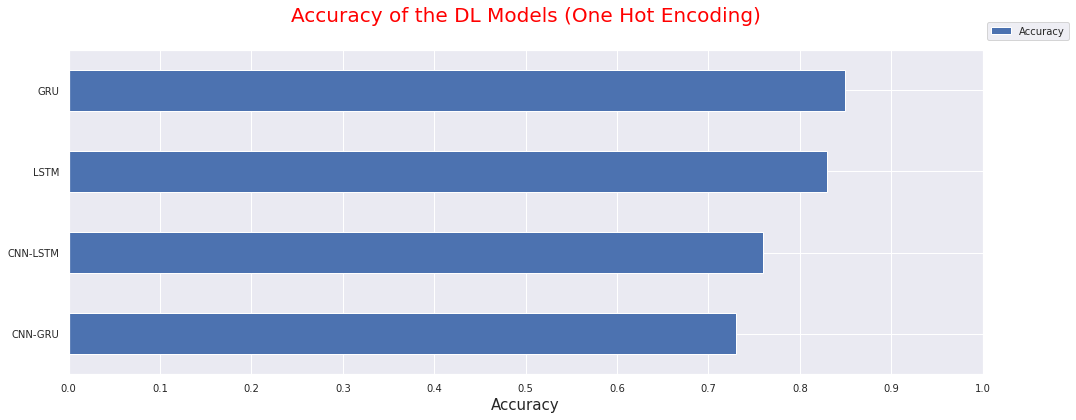

In [ ]:
acc_df.plot.barh(figsize=(15, 6));
plt.ylabel('')
plt.xlabel('Accuracy', fontsize=15)
plt.title('Accuracy of the DL Models (One Hot Encoding)\n', fontsize=20, color='red')
plt.legend(bbox_to_anchor=(1.1, 1.1), fontsize=10)
plt.xticks([0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1.0], fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
def fake_news_performance(pred, model_name=''):
  cm=confusion_matrix(y, pred)
  recall=np.diag(cm) / np.sum(cm, axis=1)
  precision=np.diag(cm) / np.sum(cm, axis=0)
  fake_recall=recall[0].round(2)
  fake_precision=precision[0].round(2)
  fake_f1_score=(2*fake_recall*fake_precision)/(fake_recall+fake_precision)
  fake_f1_score=fake_f1_score.round(2)
  label_names=['fake', 'real']
  df_cm=pd.DataFrame(cm, index=label_names, columns=label_names)
  plt.figure(figsize=(15, 6))
  sns.heatmap(df_cm, annot=True, annot_kws={"size": 15}, fmt='g')
  plt.xticks(fontsize=15)
  plt.yticks(rotation=0, fontsize=15)
  plt.title('\nConfusion Matrix for '+model_name+' (One Hot Encoding)\n', fontsize=20, color='red')
  plt.show()
    
  print('-----------------------------------------------------------------------------------------------------------------')
  print(f'\nClassification Report for:--> {model_name} (One Hot Encoding) \n{classification_report(y, pred, target_names=label_names)}')

  return fake_precision, fake_recall, fake_f1_score

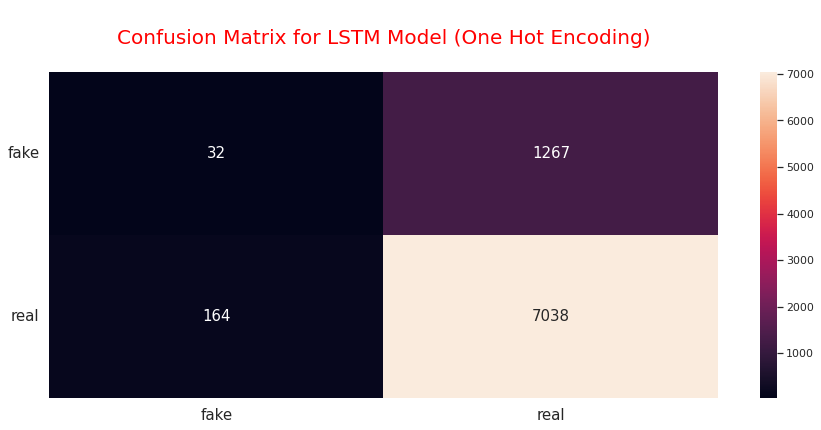

-----------------------------------------------------------------------------------------------------------------

Classification Report for:--> LSTM Model (One Hot Encoding) 
              precision    recall  f1-score   support

        fake       0.16      0.02      0.04      1299
        real       0.85      0.98      0.91      7202

    accuracy                           0.83      8501
   macro avg       0.51      0.50      0.48      8501
weighted avg       0.74      0.83      0.78      8501



In [ ]:
fake_precision_lstm, fake_recall_lstm, fake_f1_score_lstm=fake_news_performance(lstm_pred, 'LSTM Model')

In [ ]:
print(f'Precision, Recall and F1 Score for Fake News Classification using LSTM Model --> {fake_precision_lstm, fake_recall_lstm, fake_f1_score_lstm}, respectively')

Precision, Recall and F1 Score for Fake News Classification using LSTM Model --> (0.16, 0.02, 0.04), respectively


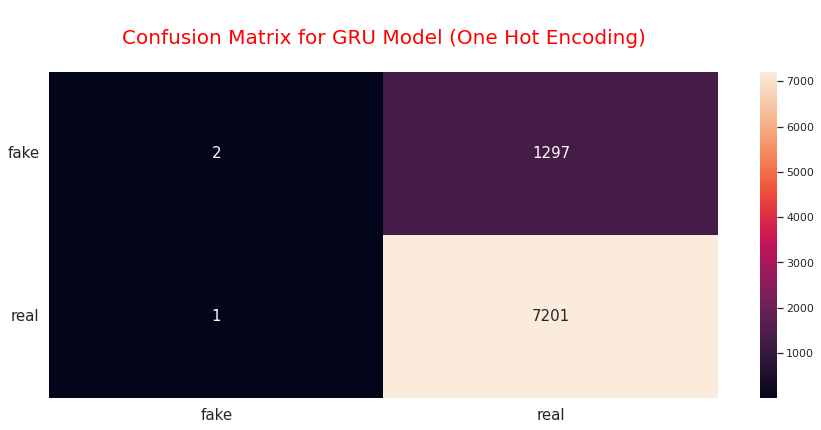

-----------------------------------------------------------------------------------------------------------------

Classification Report for:--> GRU Model (One Hot Encoding) 
              precision    recall  f1-score   support

        fake       0.67      0.00      0.00      1299
        real       0.85      1.00      0.92      7202

    accuracy                           0.85      8501
   macro avg       0.76      0.50      0.46      8501
weighted avg       0.82      0.85      0.78      8501



In [ ]:
fake_precision_gru, fake_recall_gru, fake_f1_score_gru=fake_news_performance(gru_pred, 'GRU Model')

In [ ]:
print(f'Precision, Recall and F1 Score for Fake News Classification using GRU Model --> {fake_precision_gru, fake_recall_gru, fake_f1_score_gru}, respectively')

Precision, Recall and F1 Score for Fake News Classification using GRU Model --> (0.67, 0.0, 0.0), respectively


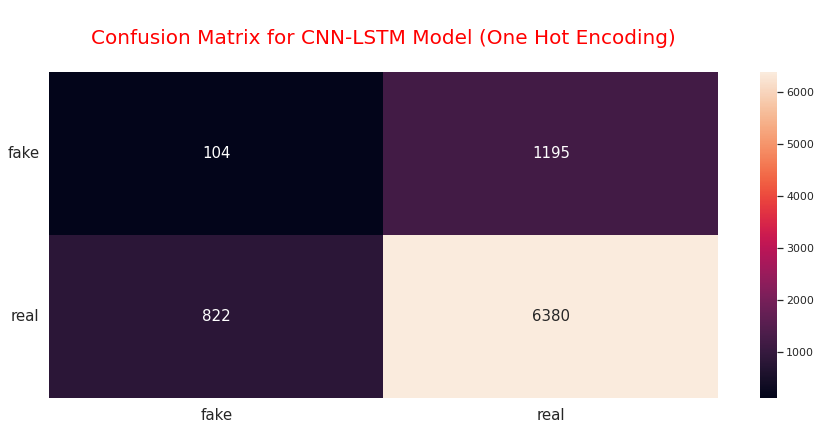

-----------------------------------------------------------------------------------------------------------------

Classification Report for:--> CNN-LSTM Model (One Hot Encoding) 
              precision    recall  f1-score   support

        fake       0.11      0.08      0.09      1299
        real       0.84      0.89      0.86      7202

    accuracy                           0.76      8501
   macro avg       0.48      0.48      0.48      8501
weighted avg       0.73      0.76      0.75      8501



In [ ]:
fake_precision_cnn_lstm, fake_recall_cnn_lstm, fake_f1_score_cnn_lstm=fake_news_performance(cnn_lstm_pred, 'CNN-LSTM Model')

In [ ]:
print(f'Precision, Recall and F1 Score for Fake News Classification using CNN-LSTM Model --> {fake_precision_cnn_lstm, fake_recall_cnn_lstm, fake_f1_score_cnn_lstm}, respectively')

Precision, Recall and F1 Score for Fake News Classification using CNN-LSTM Model --> (0.11, 0.08, 0.09), respectively


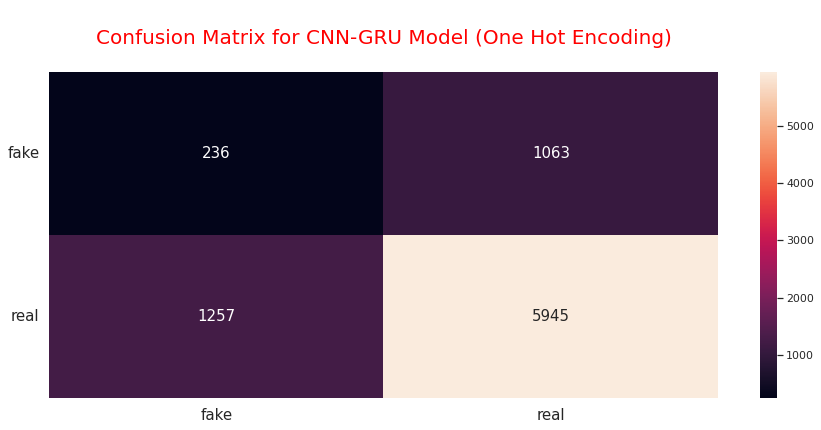

-----------------------------------------------------------------------------------------------------------------

Classification Report for:--> CNN-GRU Model (One Hot Encoding) 
              precision    recall  f1-score   support

        fake       0.16      0.18      0.17      1299
        real       0.85      0.83      0.84      7202

    accuracy                           0.73      8501
   macro avg       0.50      0.50      0.50      8501
weighted avg       0.74      0.73      0.73      8501



In [ ]:
fake_precision_cnn_gru, fake_recall_cnn_gru, fake_f1_score_cnn_gru=fake_news_performance(cnn_gru_pred, 'CNN-GRU Model')

In [ ]:
print(f'Precision, Recall and F1 Score for Fake News Classification using CNN-GRU Model --> {fake_precision_cnn_gru, fake_recall_cnn_gru, fake_f1_score_cnn_gru}, respectively')

Precision, Recall and F1 Score for Fake News Classification using CNN-GRU Model --> (0.16, 0.18, 0.17), respectively


In [ ]:
fake_perform={'Models Used':['LSTM', 'GRU', 'CNN-LSTM', 'CNN-GRU'],
              'Precision_fake':[fake_precision_lstm, fake_precision_gru, fake_precision_cnn_lstm, fake_precision_cnn_gru], 
              'Recall_fake':[fake_recall_lstm, fake_recall_gru, fake_recall_cnn_lstm, fake_recall_cnn_gru], 
              'F1-Score_fake':[fake_f1_score_lstm, fake_f1_score_gru, fake_f1_score_cnn_lstm, fake_f1_score_cnn_gru], 
              'Overall_Accuracy':[lstm_accuracy, gru_accuracy, cnn_lstm_accuracy, cnn_gru_accuracy]}

df_fake_perform=pd.DataFrame(fake_perform)
df_fake_perform

,Models Used,Precision_fake,Recall_fake,F1-Score_fake,Overall_Accuracy
0,LSTM,0.16,0.02,0.04,0.83
1,GRU,0.67,0.00,0.00,0.85
2,CNN-LSTM,0.11,0.08,0.09,0.76
3,CNN-GRU,0.16,0.18,0.17,0.73


In [ ]:
df_fake_perform.to_csv('/content/drive/MyDrive/CSE-400(Project Thesis)/fake_news_detection_performance_DL_ohe.csv', index=False)

In [ ]:
df_fake_perform.groupby('Models Used')['Precision_fake'].sum().sort_values(ascending=False)

Models Used
GRU         0.67
CNN-GRU     0.16
LSTM        0.16
CNN-LSTM    0.11
Name: Precision_fake, dtype: float64

In [ ]:
df_fake_perform.groupby('Models Used')['Recall_fake'].sum().sort_values(ascending=False)

Models Used
CNN-GRU     0.18
CNN-LSTM    0.08
LSTM        0.02
GRU         0.00
Name: Recall_fake, dtype: float64

In [ ]:
df_fake_perform.groupby('Models Used')['F1-Score_fake'].sum().sort_values(ascending=False)

Models Used
CNN-GRU     0.17
CNN-LSTM    0.09
LSTM        0.04
GRU         0.00
Name: F1-Score_fake, dtype: float64

In [ ]:
df_fake_perform.set_index('Models Used', inplace=True)
df_fake_perform

,Precision_fake,Recall_fake,F1-Score_fake,Overall_Accuracy
Models Used,,,,
LSTM,0.16,0.02,0.04,0.83
GRU,0.67,0.00,0.00,0.85
CNN-LSTM,0.11,0.08,0.09,0.76
CNN-GRU,0.16,0.18,0.17,0.73


In [ ]:
df_fake_perform=df_fake_perform.sort_values('F1-Score_fake', ascending=False)
df_fake_perform

,Precision_fake,Recall_fake,F1-Score_fake,Overall_Accuracy
Models Used,,,,
CNN-GRU,0.16,0.18,0.17,0.73
CNN-LSTM,0.11,0.08,0.09,0.76
LSTM,0.16,0.02,0.04,0.83
GRU,0.67,0.00,0.00,0.85


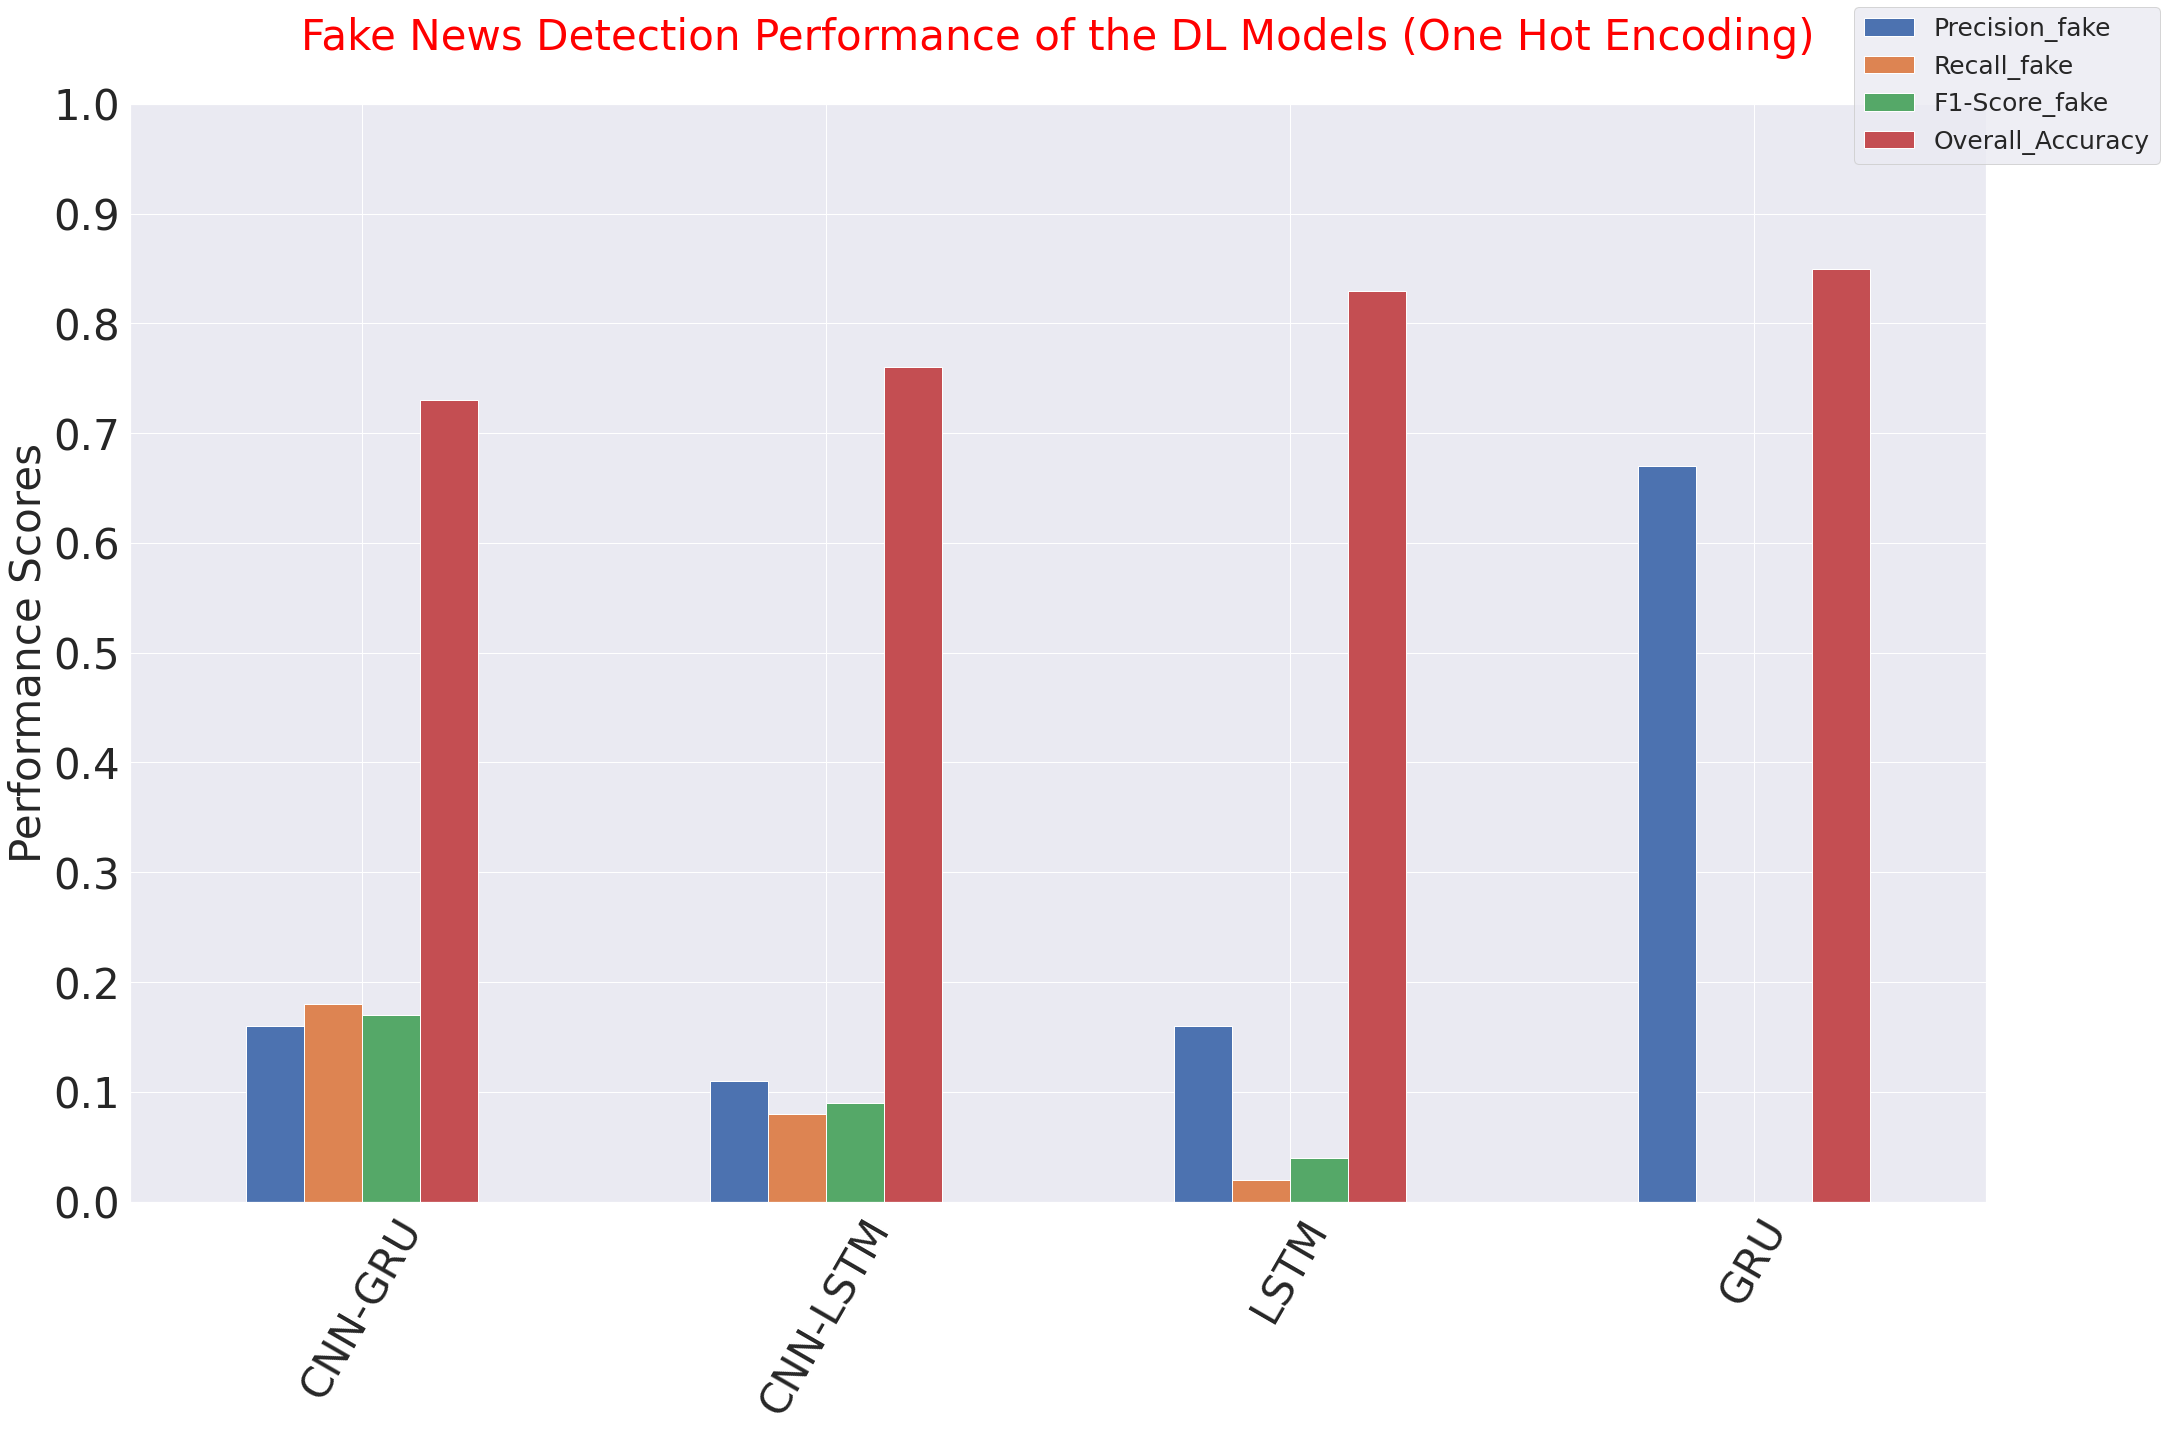

In [ ]:
df_fake_perform.plot.bar(rot=60, figsize=(30, 20));
plt.xlabel('')
plt.ylabel('Performance Scores', fontsize=42)
plt.title('Fake News Detection Performance of the DL Models (One Hot Encoding)\n', fontsize=42, color='red')
plt.legend(bbox_to_anchor=(1.1, 1.1), fontsize=25)
plt.yticks([0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1.0], fontsize=42)
plt.xticks(fontsize=42)
plt.tight_layout()
plt.show()

In [ ]:
fallout_lstm, sensitivity_lstm, thresholds_lstm=roc_curve(y, lstm_pred)
fallout_gru, sensitivity_gru, thresholds_gru=roc_curve(y, gru_pred)
fallout_cnn_lstm, sensitivity_cnn_lstm, thresholds_cnn_lstm=roc_curve(y, cnn_lstm_pred)
fallout_cnn_gru, sensitivity_cnn_gru, thresholds_cnn_gru=roc_curve(y, cnn_gru_pred)

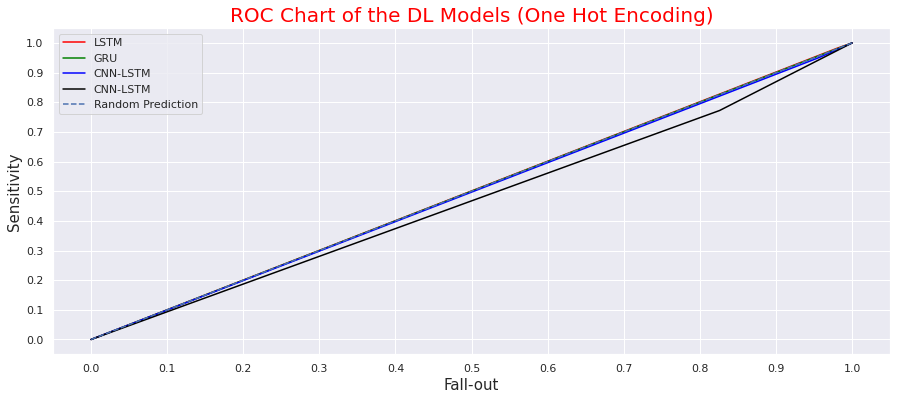

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(fallout_lstm, sensitivity_lstm, color='red', label='%s' % 'LSTM')
plt.plot(fallout_gru, sensitivity_gru, color='green', label='%s' % 'GRU')
plt.plot(fallout_cnn_lstm, sensitivity_cnn_lstm, color='blue', label='%s' % 'CNN-LSTM')
plt.plot(fallout_cnn_gru, sensitivity_cnn_gru, color='black', label='%s' % 'CNN-LSTM')
plt.plot([0,1], [0,1], linestyle='--', label='%s' % 'Random Prediction')
plt.title("ROC Chart of the DL Models (One Hot Encoding)", color='red', fontsize=20)
plt.xlabel("Fall-out", fontsize=15)
plt.ylabel("Sensitivity", fontsize=15)
plt.xticks([0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1.0])
plt.yticks([0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1.0])
plt.legend(loc='best')
plt.show()

In [ ]:
def model_roc_auc_score(pred):
  return roc_auc_score(y, pred)

lstm_auc=model_roc_auc_score(lstm_pred).round(2)
gru_auc=model_roc_auc_score(gru_pred).round(2)
cnn_lstm_auc=model_roc_auc_score(cnn_lstm_pred).round(2)
cnn_gru_auc=model_roc_auc_score(cnn_gru_pred).round(2)

In [ ]:
auc_scores={'Models Used':['LSTM', 'GRU', 'CNN-LSTM', 'CNN-GRU'],
            'AUC':[lstm_auc, gru_auc, cnn_lstm_auc, cnn_gru_auc]}

df_auc=pd.DataFrame(auc_scores)
df_auc

,Models Used,AUC
0,LSTM,0.50
1,GRU,0.50
2,CNN-LSTM,0.50
3,CNN-GRU,0.47


In [ ]:
df_auc=df_auc.sort_values('AUC')
df_auc

,Models Used,AUC
3,CNN-GRU,0.47
0,LSTM,0.50
1,GRU,0.50
2,CNN-LSTM,0.50


In [ ]:
df_auc.to_csv('/content/drive/MyDrive/CSE-400(Project Thesis)/AUC_Scores_DL_ohe.csv', index=False)

In [ ]:
auc_df=df_auc.set_index('Models Used')
auc_df

,AUC
Models Used,
CNN-GRU,0.47
LSTM,0.50
GRU,0.50
CNN-LSTM,0.50


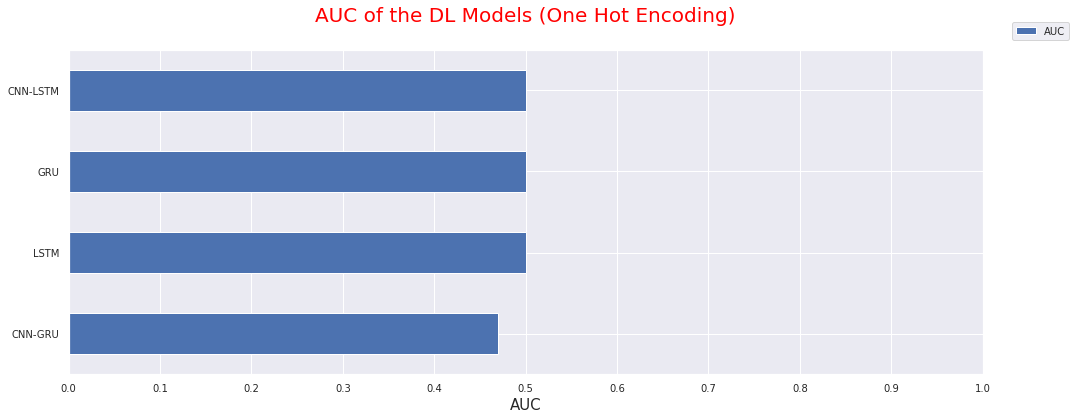

In [ ]:
auc_df.plot.barh(figsize=(15, 6));
plt.ylabel('')
plt.xlabel('AUC', fontsize=15)
plt.title('AUC of the DL Models (One Hot Encoding)\n', fontsize=20, color='red')
plt.legend(bbox_to_anchor=(1.1, 1.1), fontsize=10)
plt.xticks([0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1.0], fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()